In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_excel
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,load_model
from keras.layers import Dense

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import math
from sklearn.metrics import mean_squared_error

import pandas as pd
from pandas import datetime
import seaborn as sns
import datetime

import pandas_datareader.data as web
import matplotlib as mpl
import math
from sklearn import preprocessing

from keras.layers.core import Activation

<ipython-input-4-8bf76e52b1bc>:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
from google.colab import files
filenya= files.upload()

Saving BRIS.JK Baru.xlsx to BRIS.JK Baru.xlsx


In [ ]:
import io
df=pd.read_excel(io.BytesIO(filenya['BRIS.JK Baru.xlsx']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    586 non-null    datetime64[ns]
 1   Close   586 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.3 KB


In [ ]:
df_close=df['Close'].replace('null',np.nan)
df_close

0      2810
1      2620
2      2440
3      2270
4      2610
       ... 
581    1655
582    1660
583    1650
584    1640
585    1640
Name: Close, Length: 586, dtype: int64

In [ ]:
df_close=df.replace(np.nan,df_close.mean)

In [ ]:
df_close

,Date,Close
0,2021-01-27,2810
1,2021-01-28,2620
2,2021-01-29,2440
3,2021-02-01,2270
4,2021-02-02,2610
...,...,...
581,2023-06-15,1655
582,2023-06-16,1660
583,2023-06-19,1650
584,2023-06-20,1640


In [ ]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    586 non-null    datetime64[ns]
 1   Close   586 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.3 KB


In [ ]:
df_close.shape

(586, 2)

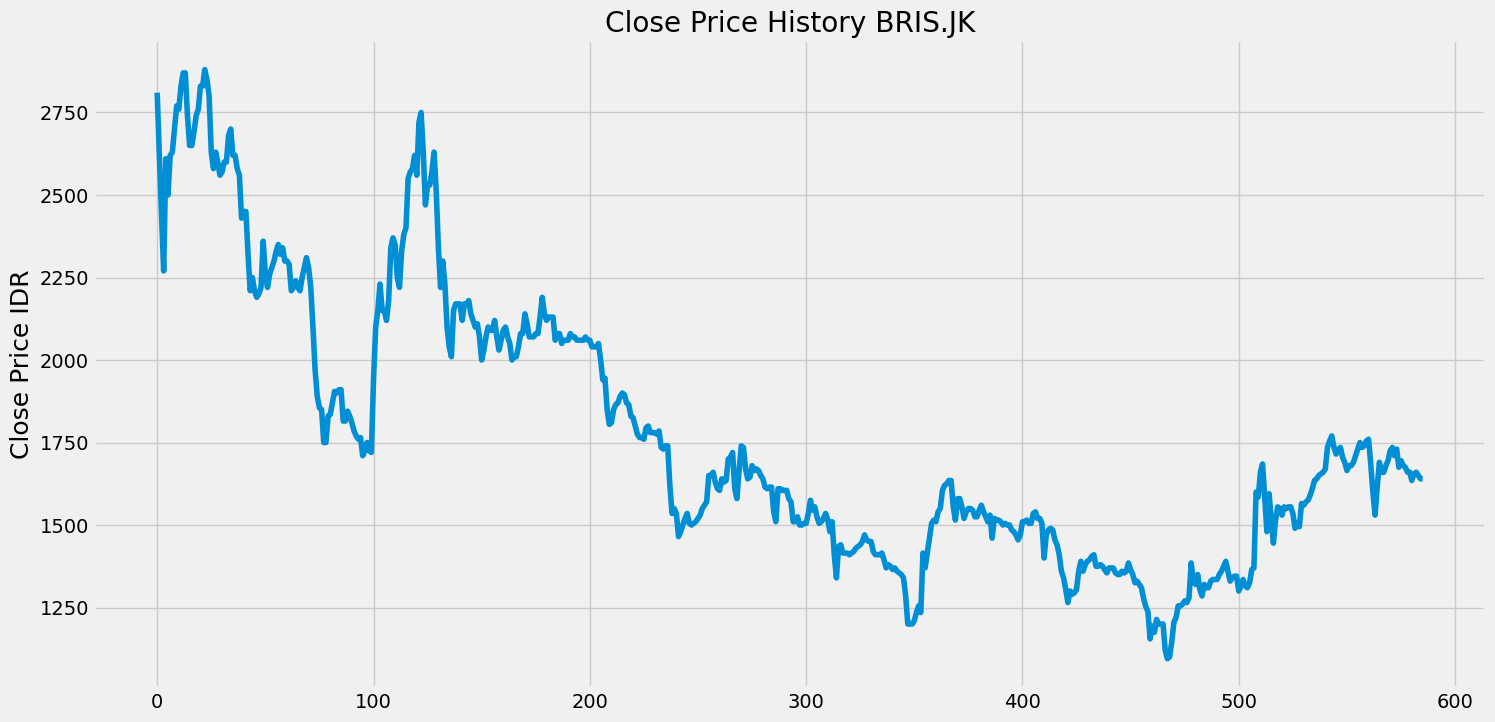

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History BRIS.JK')
plt.plot(df['Close'])
plt.ylabel('Close Price IDR',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df_close.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get/Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

469

In [ ]:
testing_data_len = math.ceil( len(dataset) *.2)
testing_data_len

118

In [ ]:
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.96078431],
       [0.85434174],
       [0.7535014 ],
       [0.65826331],
       [0.8487395 ],
       [0.78711485],
       [0.85434174],
       [0.85994398],
       [0.89915966],
       [0.93837535],
       [0.93277311],
       [0.9719888 ],
       [0.99439776],
       [0.99439776],
       [0.92156863],
       [0.87114846],
       [0.87114846],
       [0.89355742],
       [0.92156863],
       [0.93277311],
       [0.9719888 ],
       [0.9719888 ],
       [1.        ],
       [0.98319328],
       [0.95518207],
       [0.85994398],
       [0.83193277],
       [0.85994398],
       [0.84313725],
       [0.82072829],
       [0.82633053],
       [0.84313725],
       [0.84313725],
       [0.88795518],
       [0.89915966],
       [0.85434174],
       [0.85434174],
       [0.83193277],
       [0.82072829],
       [0.74789916],
       [0.75910364],
       [0.75910364],
       [0.68627451],
       [0.62464986],
       [0.64705882],
       [0.62464986],
       [0.61344538],
       [0.619

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , : ]
#Split the data into x train and y train data sets
#x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train=[]
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape[0]

409

In [ ]:
x_train

array([[[0.96078431],
        [0.85434174],
        [0.7535014 ],
        ...,
        [0.68627451],
        [0.69747899],
        [0.67507003]],

       [[0.85434174],
        [0.7535014 ],
        [0.65826331],
        ...,
        [0.69747899],
        [0.67507003],
        [0.67507003]],

       [[0.7535014 ],
        [0.65826331],
        [0.8487395 ],
        ...,
        [0.67507003],
        [0.67507003],
        [0.66946779]],

       ...,

       [[0.24929972],
        [0.23809524],
        [0.23809524],
        ...,
        [0.05882353],
        [0.05882353],
        [0.05882353]],

       [[0.23809524],
        [0.23809524],
        [0.22969188],
        ...,
        [0.05882353],
        [0.05882353],
        [0.0140056 ]],

       [[0.23809524],
        [0.22969188],
        [0.17086835],
        ...,
        [0.05882353],
        [0.0140056 ],
        [0.        ]]])

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=10, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=10, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 47ms/step - loss: 0.0710
Epoch 2/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0388
Epoch 3/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0183
Epoch 4/100
5/5 [==============================] - 0s 42ms/step - loss: 0.0107
Epoch 5/100
5/5 [==============================] - 0s 44ms/step - loss: 0.0106
Epoch 6/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0116
Epoch 7/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0102
Epoch 8/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0084
Epoch 9/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0074
Epoch 10/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0070
Epoch 11/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0065
Epoch 12/100
5/5 [==============================] - 0s 33ms/step - loss: 0.0058
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 5ms/step


array([[0.00640828],
       [0.01163828],
       [0.02997895],
       [0.04567555],
       [0.06298822],
       [0.07329879],
       [0.07989296],
       [0.08585533],
       [0.08803776],
       [0.09265029],
       [0.12166769],
       [0.12624077],
       [0.12430196],
       [0.13038914],
       [0.12310363],
       [0.11302189],
       [0.11591101],
       [0.11605705],
       [0.11586624],
       [0.12074249],
       [0.12514171],
       [0.12755413],
       [0.12875634],
       [0.13314784],
       [0.1383938 ],
       [0.1452029 ],
       [0.1529531 ],
       [0.14957207],
       [0.13926348],
       [0.13566437],
       [0.13545778],
       [0.13555971],
       [0.12425107],
       [0.12086653],
       [0.12463967],
       [0.12223729],
       [0.11913396],
       [0.12112074],
       [0.13274279],
       [0.14125173],
       [0.20630458],
       [0.24218322],
       [0.27993488],
       [0.30680594],
       [0.29132855],
       [0.25230187],
       [0.26324344],
       [0.250

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1106.4388],
       [1115.7743],
       [1148.5125],
       [1176.5309],
       [1207.434 ],
       [1225.8383],
       [1237.6089],
       [1248.2517],
       [1252.1473],
       [1260.3807],
       [1312.1769],
       [1320.3397],
       [1316.8789],
       [1327.7446],
       [1314.74  ],
       [1296.744 ],
       [1301.9012],
       [1302.1619],
       [1301.8212],
       [1310.5253],
       [1318.3779],
       [1322.6841],
       [1324.8301],
       [1332.669 ],
       [1342.033 ],
       [1354.1871],
       [1368.0214],
       [1361.9862],
       [1343.5853],
       [1337.1609],
       [1336.7921],
       [1336.9741],
       [1316.7882],
       [1310.7467],
       [1317.4818],
       [1313.1936],
       [1307.6542],
       [1311.2004],
       [1331.9459],
       [1347.1343],
       [1463.2537],
       [1527.2971],
       [1594.6838],
       [1642.6486],
       [1615.0215],
       [1545.3589],
       [1564.8895],
       [1542.9103],
       [1492.3914],
       [1498.4496],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

174.45907723331513

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

8.266800581797047e-166

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

49.73834385979483

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=10, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=10, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 3s 49ms/step - loss: 0.1617
Epoch 2/500
5/5 [==============================] - 0s 48ms/step - loss: 0.0974
Epoch 3/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0532
Epoch 4/500
5/5 [==============================] - 0s 46ms/step - loss: 0.0274
Epoch 5/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0174
Epoch 6/500
5/5 [==============================] - 0s 45ms/step - loss: 0.0170
Epoch 7/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0179
Epoch 8/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0165
Epoch 9/500
5/5 [==============================] - 0s 32ms/step - loss: 0.0138
Epoch 10/500
5/5 [==============================] - 0s 32ms/step - loss: 0.0120
Epoch 11/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0109
Epoch 12/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0102
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 0s 6ms/step


array([[0.00164211],
       [0.0222035 ],
       [0.05309667],
       [0.06322517],
       [0.08336291],
       [0.08411885],
       [0.08773778],
       [0.09295063],
       [0.09043555],
       [0.09879164],
       [0.15602052],
       [0.12459055],
       [0.12405504],
       [0.13868323],
       [0.11318836],
       [0.1043741 ],
       [0.12227876],
       [0.11589572],
       [0.11741938],
       [0.12810503],
       [0.13061042],
       [0.13121119],
       [0.13135307],
       [0.13966987],
       [0.1449057 ],
       [0.1536158 ],
       [0.16199839],
       [0.14510284],
       [0.12979133],
       [0.13503014],
       [0.13668521],
       [0.13708603],
       [0.11249657],
       [0.12176077],
       [0.13098973],
       [0.12020456],
       [0.11853286],
       [0.12612697],
       [0.14787515],
       [0.15024844],
       [0.2858255 ],
       [0.26657957],
       [0.3234023 ],
       [0.33039516],
       [0.269529  ],
       [0.21345584],
       [0.2853336 ],
       [0.228

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1097.9312],
       [1134.6332],
       [1189.7776],
       [1207.8569],
       [1243.8027],
       [1245.1522],
       [1251.6119],
       [1260.9169],
       [1256.4274],
       [1271.343 ],
       [1373.4967],
       [1317.3942],
       [1316.4382],
       [1342.5496],
       [1297.0413],
       [1281.3077],
       [1313.2676],
       [1301.8739],
       [1304.5936],
       [1323.6675],
       [1328.1396],
       [1329.2119],
       [1329.4652],
       [1344.3107],
       [1353.6567],
       [1369.2042],
       [1384.1671],
       [1354.0085],
       [1326.6775],
       [1336.0288],
       [1338.9832],
       [1339.6986],
       [1295.8064],
       [1312.3429],
       [1328.8167],
       [1309.5651],
       [1306.5812],
       [1320.1366],
       [1358.9572],
       [1363.1935],
       [1605.1985],
       [1570.8446],
       [1672.2731],
       [1684.7554],
       [1576.1093],
       [1476.0187],
       [1604.3204],
       [1502.3707],
       [1443.3662],
       [1518.3693],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

50.53444582495268

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

5.54226407221656e-174

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

42.76012074326782

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=10, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=10, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 3s 32ms/step - loss: 0.1145
Epoch 2/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0667
Epoch 3/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0353
Epoch 4/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0188
Epoch 5/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0146
Epoch 6/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0158
Epoch 7/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0151
Epoch 8/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0124
Epoch 9/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0107
Epoch 10/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0099
Epoch 11/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0091
Epoch 12/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0080
Epoch 13/1000
5/5 [==================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 0s 6ms/step


array([[0.00042626],
       [0.02123346],
       [0.05281529],
       [0.0634444 ],
       [0.08279854],
       [0.08388746],
       [0.08734113],
       [0.09306879],
       [0.09067544],
       [0.09913461],
       [0.15756007],
       [0.12432187],
       [0.12304448],
       [0.1395904 ],
       [0.11291316],
       [0.10384782],
       [0.12296013],
       [0.11609129],
       [0.1168656 ],
       [0.12794445],
       [0.13024113],
       [0.1305086 ],
       [0.13070016],
       [0.13936575],
       [0.14462481],
       [0.15330018],
       [0.1617086 ],
       [0.14379355],
       [0.12849355],
       [0.13491607],
       [0.13665958],
       [0.13652629],
       [0.11087991],
       [0.12091431],
       [0.1308722 ],
       [0.11904422],
       [0.11722569],
       [0.12545691],
       [0.14771597],
       [0.1494668 ],
       [0.28896582],
       [0.26294184],
       [0.32332838],
       [0.32941705],
       [0.26459643],
       [0.21221854],
       [0.29326007],
       [0.225

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1095.7609],
       [1132.9017],
       [1189.2753],
       [1208.2483],
       [1242.7954],
       [1244.7391],
       [1250.9039],
       [1261.1278],
       [1256.8557],
       [1271.9552],
       [1376.2448],
       [1316.9144],
       [1314.6344],
       [1344.1688],
       [1296.5499],
       [1280.3684],
       [1314.4838],
       [1302.2229],
       [1303.6051],
       [1323.3809],
       [1327.4803],
       [1327.9579],
       [1328.2997],
       [1343.7678],
       [1353.1553],
       [1368.6409],
       [1383.6499],
       [1351.6715],
       [1324.3611],
       [1335.8252],
       [1338.9374],
       [1338.6995],
       [1292.9207],
       [1310.832 ],
       [1328.6069],
       [1307.4939],
       [1304.2478],
       [1318.9406],
       [1358.673 ],
       [1361.7982],
       [1610.8041],
       [1564.3512],
       [1672.1412],
       [1683.0095],
       [1567.3046],
       [1473.81  ],
       [1618.4692],
       [1498.1455],
       [1439.7277],
       [1524.1074],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

73.68602368066102

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

7.945568642639573e-173

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.153422178258516

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=20, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=20, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 41ms/step - loss: 0.0425
Epoch 2/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0085
Epoch 3/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0111
Epoch 4/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0085
Epoch 5/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0042
Epoch 6/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0045
Epoch 7/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0039
Epoch 8/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0027
Epoch 9/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0026
Epoch 10/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0022
Epoch 11/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0018
Epoch 12/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0018
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 7ms/step


array([[0.00602096],
       [0.01286143],
       [0.03422313],
       [0.0521606 ],
       [0.07114693],
       [0.08172563],
       [0.08785429],
       [0.09327734],
       [0.09461649],
       [0.09886013],
       [0.13055432],
       [0.13446705],
       [0.13093792],
       [0.13663219],
       [0.12758574],
       [0.11581732],
       [0.11896105],
       [0.11921739],
       [0.11908454],
       [0.12456802],
       [0.12939651],
       [0.13185649],
       [0.13288821],
       [0.13749544],
       [0.14303122],
       [0.15024401],
       [0.15839624],
       [0.15392263],
       [0.14186525],
       [0.13771854],
       [0.13764864],
       [0.1379981 ],
       [0.12555619],
       [0.12213653],
       [0.12682268],
       [0.12449677],
       [0.12129419],
       [0.12376269],
       [0.13694292],
       [0.14633146],
       [0.21930861],
       [0.25759324],
       [0.29703134],
       [0.32330257],
       [0.3010451 ],
       [0.25403842],
       [0.26576594],
       [0.251

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1105.7474],
       [1117.9576],
       [1156.0883],
       [1188.1067],
       [1221.9973],
       [1240.8802],
       [1251.82  ],
       [1261.5001],
       [1263.8905],
       [1271.4653],
       [1328.0396],
       [1335.0237],
       [1328.7241],
       [1338.8884],
       [1322.7405],
       [1301.7339],
       [1307.3455],
       [1307.803 ],
       [1307.5659],
       [1317.3539],
       [1325.9728],
       [1330.3638],
       [1332.2054],
       [1340.4293],
       [1350.3107],
       [1363.1855],
       [1377.7373],
       [1369.752 ],
       [1348.2295],
       [1340.8275],
       [1340.7029],
       [1341.3267],
       [1319.1178],
       [1313.0138],
       [1321.3784],
       [1317.2268],
       [1311.5101],
       [1315.9164],
       [1339.4431],
       [1356.2017],
       [1486.466 ],
       [1554.804 ],
       [1625.2009],
       [1672.0951],
       [1632.3655],
       [1548.4586],
       [1569.3922],
       [1543.7843],
       [1487.1737],
       [1495.7924],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

77.30041085067474

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

3.1565435068453755e-169

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

47.322711709494904

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=20, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=20, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 3s 36ms/step - loss: 0.0730
Epoch 2/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0227
Epoch 3/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0091
Epoch 4/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0134
Epoch 5/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0100
Epoch 6/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0062
Epoch 7/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0060
Epoch 8/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0055
Epoch 9/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0041
Epoch 10/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0035
Epoch 11/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0032
Epoch 12/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0026
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 9ms/step


array([[0.0005708 ],
       [0.02225284],
       [0.05461284],
       [0.06483939],
       [0.08664746],
       [0.08766122],
       [0.09202325],
       [0.09782939],
       [0.09485432],
       [0.10369638],
       [0.16366671],
       [0.12722103],
       [0.1285311 ],
       [0.14497815],
       [0.11644103],
       [0.1079706 ],
       [0.12722461],
       [0.11882561],
       [0.1202895 ],
       [0.13169762],
       [0.13372631],
       [0.13425502],
       [0.13458492],
       [0.14345641],
       [0.14853571],
       [0.1574377 ],
       [0.16595647],
       [0.14773445],
       [0.13263877],
       [0.1390371 ],
       [0.13995698],
       [0.13974895],
       [0.11358277],
       [0.12465335],
       [0.1338938 ],
       [0.12155806],
       [0.12046362],
       [0.12885408],
       [0.15138014],
       [0.15280887],
       [0.2951681 ],
       [0.26663345],
       [0.32900605],
       [0.3349259 ],
       [0.2705346 ],
       [0.21814872],
       [0.29774573],
       [0.229

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1096.0189],
       [1134.7213],
       [1192.4839],
       [1210.7383],
       [1249.6658],
       [1251.4753],
       [1259.2616],
       [1269.6254],
       [1264.315 ],
       [1280.098 ],
       [1387.145 ],
       [1322.0895],
       [1324.4281],
       [1353.786 ],
       [1302.8473],
       [1287.7275],
       [1322.096 ],
       [1307.1036],
       [1309.7168],
       [1330.0802],
       [1333.7015],
       [1334.6451],
       [1335.2341],
       [1351.0697],
       [1360.1362],
       [1376.0262],
       [1391.2323],
       [1358.7059],
       [1331.7603],
       [1343.1813],
       [1344.8232],
       [1344.4519],
       [1297.7452],
       [1317.5062],
       [1334.0005],
       [1311.9811],
       [1310.0276],
       [1325.0045],
       [1365.2135],
       [1367.7638],
       [1621.8751],
       [1570.9408],
       [1682.2758],
       [1692.8428],
       [1577.9043],
       [1484.3955],
       [1626.4761],
       [1504.592 ],
       [1447.1837],
       [1531.2657],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

3.2038364537368866

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

4.1712266050032243e-175

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

42.663110846184544

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=20, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=20, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 3s 38ms/step - loss: 0.1121
Epoch 2/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0421
Epoch 3/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0156
Epoch 4/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0190
Epoch 5/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0174
Epoch 6/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0109
Epoch 7/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0096
Epoch 8/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0092
Epoch 9/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0074
Epoch 10/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0057
Epoch 11/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0050
Epoch 12/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0040
Epoch 13/1000
5/5 [==================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 0s 8ms/step


array([[0.00183355],
       [0.02385082],
       [0.05640959],
       [0.06843628],
       [0.089284  ],
       [0.08911807],
       [0.09390134],
       [0.09817547],
       [0.09628318],
       [0.10466404],
       [0.16364099],
       [0.12856597],
       [0.13247   ],
       [0.14164895],
       [0.1192267 ],
       [0.10925588],
       [0.12679504],
       [0.1203816 ],
       [0.12281357],
       [0.13204308],
       [0.13538395],
       [0.13572885],
       [0.13564703],
       [0.14435717],
       [0.1494147 ],
       [0.15875572],
       [0.16666652],
       [0.14897692],
       [0.13396034],
       [0.13882637],
       [0.14080007],
       [0.14159466],
       [0.11530215],
       [0.12607427],
       [0.13366312],
       [0.12456885],
       [0.1219454 ],
       [0.12959234],
       [0.15248406],
       [0.15426491],
       [0.29804587],
       [0.26328942],
       [0.33980897],
       [0.32167006],
       [0.2781819 ],
       [0.20927453],
       [0.29984242],
       [0.222

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1098.273 ],
       [1137.5737],
       [1195.691 ],
       [1217.1588],
       [1254.3718],
       [1254.0758],
       [1262.6139],
       [1270.2433],
       [1266.8655],
       [1281.8253],
       [1387.0992],
       [1324.4902],
       [1331.4589],
       [1347.8434],
       [1307.8197],
       [1290.0217],
       [1321.3291],
       [1309.8812],
       [1314.2222],
       [1330.6969],
       [1336.6603],
       [1337.276 ],
       [1337.1299],
       [1352.6775],
       [1361.7052],
       [1378.379 ],
       [1392.4998],
       [1360.9238],
       [1334.1191],
       [1342.805 ],
       [1346.3281],
       [1347.7465],
       [1300.8143],
       [1320.0426],
       [1333.5887],
       [1317.3553],
       [1312.6726],
       [1326.3223],
       [1367.1841],
       [1370.3628],
       [1627.012 ],
       [1564.9716],
       [1701.559 ],
       [1669.181 ],
       [1591.5548],
       [1468.555 ],
       [1630.2188],
       [1491.9934],
       [1466.489 ],
       [1515.2029],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

0.8443991272816466

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

1.4040875174392734e-174

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.003589399962884

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=30, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=30, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 39ms/step - loss: 0.1020
Epoch 2/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0246
Epoch 3/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0163
Epoch 4/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0183
Epoch 5/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0082
Epoch 6/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0085
Epoch 7/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0077
Epoch 8/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0048
Epoch 9/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0043
Epoch 10/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0036
Epoch 11/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0026
Epoch 12/100
5/5 [==============================] - 0s 56ms/step - loss: 0.0024
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 7ms/step


array([[0.00891402],
       [0.0129313 ],
       [0.0312054 ],
       [0.04883052],
       [0.06748054],
       [0.07906751],
       [0.08587673],
       [0.09135918],
       [0.09316692],
       [0.09703026],
       [0.12460297],
       [0.13158324],
       [0.12964417],
       [0.13427918],
       [0.12702017],
       [0.11608794],
       [0.11748198],
       [0.11792331],
       [0.1180182 ],
       [0.12282894],
       [0.12762384],
       [0.13038991],
       [0.13164018],
       [0.13575236],
       [0.14101875],
       [0.14790556],
       [0.15580715],
       [0.15291809],
       [0.14213817],
       [0.13722025],
       [0.13654839],
       [0.13684385],
       [0.12623695],
       [0.12205955],
       [0.1255366 ],
       [0.12399507],
       [0.12110902],
       [0.12285184],
       [0.13435513],
       [0.14387748],
       [0.20790942],
       [0.24953023],
       [0.28916222],
       [0.31651393],
       [0.29926616],
       [0.2550367 ],
       [0.26041993],
       [0.249

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1110.9115],
       [1118.0824],
       [1150.7017],
       [1182.1625],
       [1215.4528],
       [1236.1355],
       [1248.2899],
       [1258.076 ],
       [1261.303 ],
       [1268.199 ],
       [1317.4164],
       [1329.8761],
       [1326.4149],
       [1334.6882],
       [1321.731 ],
       [1302.2169],
       [1304.7053],
       [1305.493 ],
       [1305.6625],
       [1314.2496],
       [1322.8085],
       [1327.746 ],
       [1329.9777],
       [1337.318 ],
       [1346.7185],
       [1359.0114],
       [1373.1157],
       [1367.9587],
       [1348.7166],
       [1339.9381],
       [1338.7388],
       [1339.2662],
       [1320.3329],
       [1312.8763],
       [1319.0828],
       [1316.3312],
       [1311.1796],
       [1314.2905],
       [1334.824 ],
       [1351.8213],
       [1466.1183],
       [1540.4115],
       [1611.1545],
       [1659.9773],
       [1629.1902],
       [1550.2406],
       [1559.8496],
       [1539.4766],
       [1488.4395],
       [1490.9152],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

167.7513924936693

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

7.089674787166256e-167

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

48.93100972690195

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=30, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=30, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 3s 36ms/step - loss: 0.0732
Epoch 2/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0100
Epoch 3/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0190
Epoch 4/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0096
Epoch 5/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0062
Epoch 6/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0072
Epoch 7/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0046
Epoch 8/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0033
Epoch 9/500
5/5 [==============================] - 0s 57ms/step - loss: 0.0032
Epoch 10/500
5/5 [==============================] - 0s 56ms/step - loss: 0.0022
Epoch 11/500
5/5 [==============================] - 0s 58ms/step - loss: 0.0021
Epoch 12/500
5/5 [==============================] - 0s 59ms/step - loss: 0.0019
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 0s 7ms/step


array([[-0.00268293],
       [ 0.01765108],
       [ 0.04897208],
       [ 0.06008061],
       [ 0.07985445],
       [ 0.0813671 ],
       [ 0.08523213],
       [ 0.09094994],
       [ 0.08890656],
       [ 0.09731391],
       [ 0.15445155],
       [ 0.12338469],
       [ 0.12243789],
       [ 0.13744007],
       [ 0.11236128],
       [ 0.10336818],
       [ 0.12113226],
       [ 0.11485314],
       [ 0.11583351],
       [ 0.12625894],
       [ 0.12877643],
       [ 0.1292597 ],
       [ 0.12940288],
       [ 0.13782595],
       [ 0.14313175],
       [ 0.15181917],
       [ 0.16016817],
       [ 0.14315625],
       [ 0.12807761],
       [ 0.13361263],
       [ 0.13536681],
       [ 0.1354914 ],
       [ 0.11055397],
       [ 0.11969314],
       [ 0.12902199],
       [ 0.1181487 ],
       [ 0.11616275],
       [ 0.12378342],
       [ 0.14562193],
       [ 0.14794102],
       [ 0.28386506],
       [ 0.2613772 ],
       [ 0.3207179 ],
       [ 0.32534045],
       [ 0.26459938],
       [ 0

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1090.2109],
       [1126.5072],
       [1182.4152],
       [1202.2439],
       [1237.5402],
       [1240.2402],
       [1247.1393],
       [1257.3456],
       [1253.6982],
       [1268.7053],
       [1370.696 ],
       [1315.2417],
       [1313.5516],
       [1340.3304],
       [1295.5648],
       [1279.5122],
       [1311.2211],
       [1300.0128],
       [1301.7628],
       [1320.3722],
       [1324.866 ],
       [1325.7286],
       [1325.9841],
       [1341.0193],
       [1350.4902],
       [1365.9973],
       [1380.9003],
       [1350.5339],
       [1323.6185],
       [1333.4985],
       [1336.6298],
       [1336.8522],
       [1292.3387],
       [1308.6522],
       [1325.3042],
       [1305.8954],
       [1302.3505],
       [1315.9534],
       [1354.9352],
       [1359.0747],
       [1601.6991],
       [1561.5582],
       [1667.4814],
       [1675.7328],
       [1567.3099],
       [1474.2529],
       [1611.1493],
       [1498.9347],
       [1443.355 ],
       [1518.63  ],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

135.85473822481453

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

2.9851958261598475e-171

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.62511429906762

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=30, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=30, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 3s 35ms/step - loss: 0.1536
Epoch 2/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0645
Epoch 3/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0205
Epoch 4/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0178
Epoch 5/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0191
Epoch 6/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0115
Epoch 7/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0095
Epoch 8/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0094
Epoch 9/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0071
Epoch 10/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0054
Epoch 11/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0046
Epoch 12/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0035
Epoch 13/1000
5/5 [==================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 7ms/step


array([[-0.00169515],
       [ 0.01689496],
       [ 0.05001311],
       [ 0.06640781],
       [ 0.08594104],
       [ 0.08864203],
       [ 0.09121992],
       [ 0.09599083],
       [ 0.09403495],
       [ 0.10144137],
       [ 0.15801033],
       [ 0.13103107],
       [ 0.12812869],
       [ 0.14017333],
       [ 0.11763521],
       [ 0.10698726],
       [ 0.1231597 ],
       [ 0.11934808],
       [ 0.12020635],
       [ 0.13000137],
       [ 0.13355301],
       [ 0.13413599],
       [ 0.13392834],
       [ 0.14226048],
       [ 0.14794609],
       [ 0.15696245],
       [ 0.16531952],
       [ 0.14822204],
       [ 0.13233015],
       [ 0.13661289],
       [ 0.13938211],
       [ 0.14014015],
       [ 0.11505046],
       [ 0.12285245],
       [ 0.13259585],
       [ 0.12355397],
       [ 0.12052347],
       [ 0.12766282],
       [ 0.15038243],
       [ 0.15389825],
       [ 0.2934337 ],
       [ 0.26707578],
       [ 0.33795112],
       [ 0.32259104],
       [ 0.27692643],
       [ 0

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1091.9742],
       [1125.1575],
       [1184.2733],
       [1213.538 ],
       [1248.4048],
       [1253.2261],
       [1257.8275],
       [1266.3436],
       [1262.8523],
       [1276.0728],
       [1377.0485],
       [1328.8904],
       [1323.7097],
       [1345.2094],
       [1304.9789],
       [1285.9723],
       [1314.84  ],
       [1308.0363],
       [1309.5682],
       [1327.0525],
       [1333.3921],
       [1334.4327],
       [1334.062 ],
       [1348.9349],
       [1359.0837],
       [1375.178 ],
       [1390.0953],
       [1359.5764],
       [1331.2094],
       [1338.854 ],
       [1343.797 ],
       [1345.1501],
       [1300.3651],
       [1314.2916],
       [1331.6836],
       [1315.5438],
       [1310.1344],
       [1322.878 ],
       [1363.4326],
       [1369.7084],
       [1618.7792],
       [1571.7303],
       [1698.2428],
       [1670.825 ],
       [1589.3137],
       [1467.5226],
       [1628.5798],
       [1493.5962],
       [1463.8672],
       [1513.303 ],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

3.335997455141553

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

4.100605043262192e-173

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.528049114476616

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=40, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=40, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 41ms/step - loss: 0.1105
Epoch 2/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0187
Epoch 3/100
5/5 [==============================] - 0s 39ms/step - loss: 0.0200
Epoch 4/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0139
Epoch 5/100
5/5 [==============================] - 0s 42ms/step - loss: 0.0064
Epoch 6/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0085
Epoch 7/100
5/5 [==============================] - 0s 41ms/step - loss: 0.0067
Epoch 8/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0041
Epoch 9/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0039
Epoch 10/100
5/5 [==============================] - 0s 69ms/step - loss: 0.0031
Epoch 11/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0025
Epoch 12/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0023
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 8ms/step


array([[0.00550447],
       [0.01076359],
       [0.031023  ],
       [0.04968096],
       [0.06910627],
       [0.08051016],
       [0.08693326],
       [0.09225132],
       [0.09372077],
       [0.09774956],
       [0.12790732],
       [0.13388991],
       [0.13089661],
       [0.1359227 ],
       [0.1275947 ],
       [0.1159299 ],
       [0.11828222],
       [0.11894438],
       [0.11911156],
       [0.12445017],
       [0.12945652],
       [0.13213359],
       [0.13323359],
       [0.13761878],
       [0.14313684],
       [0.15034077],
       [0.15852946],
       [0.15467626],
       [0.14278749],
       [0.13806625],
       [0.13784392],
       [0.1383848 ],
       [0.12671688],
       [0.12277684],
       [0.12704486],
       [0.12524669],
       [0.12212802],
       [0.12423166],
       [0.13686709],
       [0.14664024],
       [0.21657684],
       [0.25769636],
       [0.29714316],
       [0.32310817],
       [0.3007387 ],
       [0.2527184 ],
       [0.26290107],
       [0.251

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1104.8254],
       [1114.213 ],
       [1150.376 ],
       [1183.6805],
       [1218.3546],
       [1238.7107],
       [1250.1759],
       [1259.6686],
       [1262.2915],
       [1269.4829],
       [1323.3146],
       [1333.9935],
       [1328.6504],
       [1337.622 ],
       [1322.7565],
       [1301.9349],
       [1306.1338],
       [1307.3157],
       [1307.6141],
       [1317.1436],
       [1326.08  ],
       [1330.8584],
       [1332.8219],
       [1340.6495],
       [1350.4993],
       [1363.3583],
       [1377.9751],
       [1371.0972],
       [1349.8756],
       [1341.4482],
       [1341.0514],
       [1342.0168],
       [1321.1896],
       [1314.1566],
       [1321.7751],
       [1318.5653],
       [1312.9985],
       [1316.7535],
       [1339.3077],
       [1356.7529],
       [1481.5896],
       [1554.988 ],
       [1625.4006],
       [1671.748 ],
       [1631.8186],
       [1546.1024],
       [1564.2784],
       [1543.0774],
       [1488.8501],
       [1496.2356],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

45.35534792256778

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

2.72247989677072e-169

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

47.54157353497365

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=40, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=40, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 3s 65ms/step - loss: 0.1377
Epoch 2/500
5/5 [==============================] - 0s 62ms/step - loss: 0.0244
Epoch 3/500
5/5 [==============================] - 0s 65ms/step - loss: 0.0191
Epoch 4/500
5/5 [==============================] - 0s 65ms/step - loss: 0.0175
Epoch 5/500
5/5 [==============================] - 0s 67ms/step - loss: 0.0070
Epoch 6/500
5/5 [==============================] - 0s 53ms/step - loss: 0.0083
Epoch 7/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0072
Epoch 8/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0041
Epoch 9/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0039
Epoch 10/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0033
Epoch 11/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0023
Epoch 12/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0023
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 11ms/step


array([[0.00233996],
       [0.02317248],
       [0.05512629],
       [0.06627613],
       [0.08722825],
       [0.08892619],
       [0.09306484],
       [0.09891602],
       [0.09649673],
       [0.10504092],
       [0.1633931 ],
       [0.13085555],
       [0.1303337 ],
       [0.1462635 ],
       [0.11969841],
       [0.11052736],
       [0.12893422],
       [0.12188432],
       [0.12295707],
       [0.13394164],
       [0.13636811],
       [0.13690193],
       [0.1371756 ],
       [0.14578362],
       [0.15108927],
       [0.15990603],
       [0.16846089],
       [0.15105471],
       [0.13572253],
       [0.14148572],
       [0.14288275],
       [0.14282829],
       [0.11742247],
       [0.12709133],
       [0.13654403],
       [0.12505807],
       [0.12336702],
       [0.13136327],
       [0.15351737],
       [0.15573798],
       [0.29386365],
       [0.27096263],
       [0.33057493],
       [0.33750445],
       [0.2744072 ],
       [0.22153082],
       [0.2989423 ],
       [0.234

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1099.1769],
       [1136.3628],
       [1193.4004],
       [1213.303 ],
       [1250.7024],
       [1253.7332],
       [1261.1207],
       [1271.5651],
       [1267.2467],
       [1282.498 ],
       [1386.6567],
       [1328.5771],
       [1327.6456],
       [1356.0803],
       [1308.6617],
       [1292.2914],
       [1325.1476],
       [1312.5635],
       [1314.4784],
       [1334.0858],
       [1338.4171],
       [1339.37  ],
       [1339.8584],
       [1355.2238],
       [1364.6943],
       [1380.4323],
       [1395.7026],
       [1364.6327],
       [1337.2648],
       [1347.552 ],
       [1350.0457],
       [1349.9485],
       [1304.5991],
       [1321.858 ],
       [1338.7311],
       [1318.2286],
       [1315.2102],
       [1329.4835],
       [1369.0286],
       [1372.9923],
       [1619.5466],
       [1578.6683],
       [1685.0763],
       [1697.4454],
       [1584.8169],
       [1490.4325],
       [1628.6119],
       [1514.2028],
       [1455.3511],
       [1535.4934],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

21.378264037119486

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

2.2570915138709254e-174

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.152343499163905

In [ ]:
#Build the GRU network model
model = Sequential()
model.add(GRU(units=40, return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(GRU(units=40, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 3s 38ms/step - loss: 0.0999
Epoch 2/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0142
Epoch 3/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0212
Epoch 4/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0102
Epoch 5/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0067
Epoch 6/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0074
Epoch 7/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0044
Epoch 8/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0034
Epoch 9/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0032
Epoch 10/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0022
Epoch 11/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0021
Epoch 12/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0018
Epoch 13/1000
5/5 [==================

In [ ]:
#import matplotlib.pyplot as plt

# summarize history for loss
#plt.plot(model.fit(x_train, y_train, batch_size=85, epochs=1000).model.fit(x_train, y_train, batch_size=85, epochs=1000)['loss'])
#plt.plot(model.fit(x_train, y_train, batch_size=85, epochs=1000).model.fit(x_train, y_train, batch_size=85, epochs=1000)['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 0s 7ms/step


array([[-0.00162981],
       [ 0.01797826],
       [ 0.04921413],
       [ 0.06425753],
       [ 0.08509918],
       [ 0.08644397],
       [ 0.09161709],
       [ 0.09467173],
       [ 0.0941166 ],
       [ 0.10092547],
       [ 0.15764141],
       [ 0.12825802],
       [ 0.13072771],
       [ 0.13645047],
       [ 0.11948276],
       [ 0.10557558],
       [ 0.12364524],
       [ 0.11746543],
       [ 0.12086239],
       [ 0.12797105],
       [ 0.13345182],
       [ 0.13265543],
       [ 0.13345315],
       [ 0.14105895],
       [ 0.14698116],
       [ 0.15589738],
       [ 0.16403371],
       [ 0.14729202],
       [ 0.13182074],
       [ 0.13566712],
       [ 0.13839945],
       [ 0.13924941],
       [ 0.11375223],
       [ 0.12300187],
       [ 0.13017285],
       [ 0.12341867],
       [ 0.1188832 ],
       [ 0.12687661],
       [ 0.14876023],
       [ 0.15228665],
       [ 0.29080257],
       [ 0.2644028 ],
       [ 0.33885694],
       [ 0.31614637],
       [ 0.28131837],
       [ 0

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1092.0908],
       [1127.0912],
       [1182.8473],
       [1209.6997],
       [1246.9021],
       [1249.3025],
       [1258.5365],
       [1263.989 ],
       [1262.9982],
       [1275.152 ],
       [1376.39  ],
       [1323.9406],
       [1328.349 ],
       [1338.5641],
       [1308.2767],
       [1283.4524],
       [1315.7067],
       [1304.6758],
       [1310.7394],
       [1323.4283],
       [1333.2115],
       [1331.7899],
       [1333.2139],
       [1346.7902],
       [1357.3613],
       [1373.2769],
       [1387.8002],
       [1357.9163],
       [1330.3   ],
       [1337.1658],
       [1342.043 ],
       [1343.5602],
       [1298.0477],
       [1314.5583],
       [1327.3585],
       [1315.3022],
       [1307.2065],
       [1321.4747],
       [1360.537 ],
       [1366.8317],
       [1614.0825],
       [1566.9591],
       [1699.8596],
       [1659.3213],
       [1597.1533],
       [1455.7004],
       [1635.2354],
       [1486.391 ],
       [1470.4222],
       [1501.4095],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

22.013071483204268

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

6.717120362284117e-173

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.93845920819185

<ipython-input-155-24363dd7bf88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


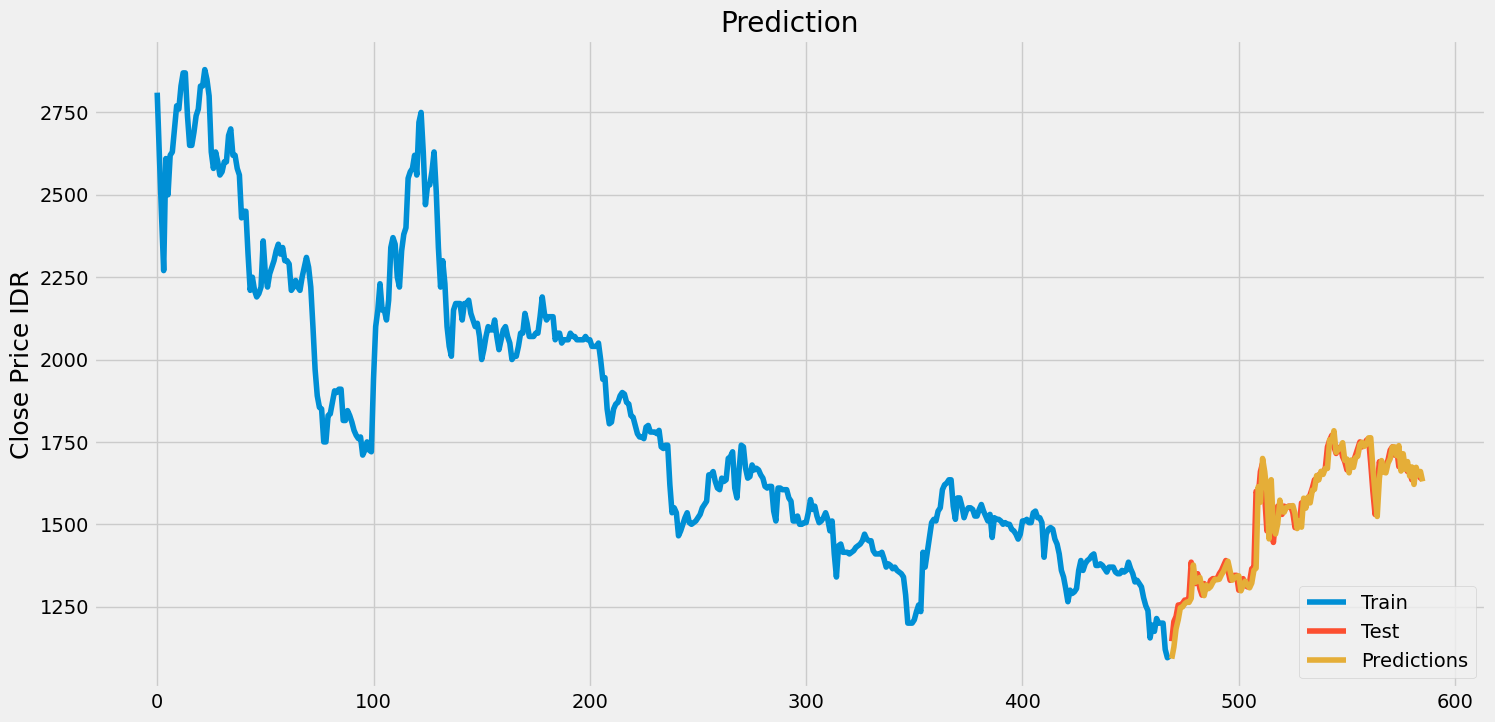

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid predicted prices
valid

,Close,Predictions
469,1145,1092.090820
470,1205,1127.091187
471,1220,1182.847290
472,1255,1209.699707
473,1255,1246.902100
...,...,...
581,1655,1620.963257
582,1660,1672.863892
583,1650,1649.546631
584,1640,1660.258301


In [ ]:
predictions

array([[1092.0908],
       [1127.0912],
       [1182.8473],
       [1209.6997],
       [1246.9021],
       [1249.3025],
       [1258.5365],
       [1263.989 ],
       [1262.9982],
       [1275.152 ],
       [1376.39  ],
       [1323.9406],
       [1328.349 ],
       [1338.5641],
       [1308.2767],
       [1283.4524],
       [1315.7067],
       [1304.6758],
       [1310.7394],
       [1323.4283],
       [1333.2115],
       [1331.7899],
       [1333.2139],
       [1346.7902],
       [1357.3613],
       [1373.2769],
       [1387.8002],
       [1357.9163],
       [1330.3   ],
       [1337.1658],
       [1342.043 ],
       [1343.5602],
       [1298.0477],
       [1314.5583],
       [1327.3585],
       [1315.3022],
       [1307.2065],
       [1321.4747],
       [1360.537 ],
       [1366.8317],
       [1614.0825],
       [1566.9591],
       [1699.8596],
       [1659.3213],
       [1597.1533],
       [1455.7004],
       [1635.2354],
       [1486.391 ],
       [1470.4222],
       [1501.4095],


In [ ]:
model